# Newman Exercise 5.21 (a) & (b)

**Electric field of a charge distribution:**

Suppose we have a distribution of charges and we want to calculate the resulting electric field. One way to do this is to first calculate the electric potential ϕ and then take its gradient. For a point charge q at the origin, the electric potential at a distance r from the origin is ϕ = q/4πε0r and electric field is **E** = -**∇**(ϕ).

(a) You have two charges, of ± 1 C, 10 cm (0.1 meters) apart. Calculate the resulting electric potential on a 1 m x 1 m square plane surrounding the charges and passing through them. Calculate the potential at 1 cm spaced points in a grid and make a visualization on the screen of the potential using a density plot.

(b) Now calculate the partial derivatives of the potential with respect to x and y and hence find the electric field in the xy plane. Make a visulization of the field also. This is a little trickier than viualizing the potential, because the electric field has both magnitude and direction. One way to do it might be to make two density plots, one for the magnitude, and one for the direction, the latter using the "hsv" color scheme in pylab, which is a rainbow scheme that passes through all the colors but starts and ends with the same shade of red, which makes it suitable for representing things like directions or angles that go around the full circle and arrow object from the visual package, drawing a grid of arrows with direction and length chosen to represent the field.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

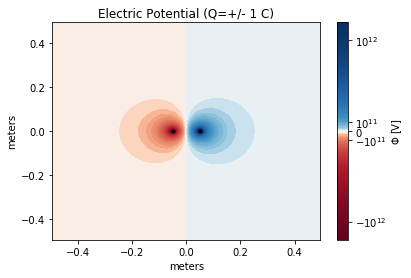

In [48]:
# constants
k = 9 * 10**9 # 1/4*π*ε0 [N*m**2 / C**2]

# location of charged particles
# p1/2 = [y,x] = [i,j]
p1 = [0,-0.05] # - charged
p2 = [0,0.05] # + charged

# creating an line to build a plane with considering our particles left out.
line = np.arange(-.495,.5,0.01)

# creating a xy plane with numerical representation.
x,y = np.meshgrid(line,line) # 100x100 array

# storage units to keep data.
storage1 = np.empty((100,100)) # 100x100 array
storage2 = np.empty((100,100))

# storing distance from p1/2 to everywhere in space.
for i in range(100):
    for j in range(100):
        storage1[i,j] = np.sqrt((p1[0]-line[i])**2 + (p1[1]-line[j])**2)
        storage2[i,j] = np.sqrt((p2[0]-line[i])**2 + (p2[1]-line[j])**2)
        
# potential data stored as 100x100 plane       
V = k * (-1/ storage1 + 1/ storage2) # q = 1C

norm = colors.SymLogNorm(linthresh=3e10)
# The symmetrical logarithmic scale is logarithmic in both the positive and negative directions from the origin.
# Since the values close to zero tend toward infinity, there is a need to have a range around zero that is linear. 
# The parameter linthresh allows the user to specify the size of this range (-linthresh, linthresh).
# linthresh: The range within which the plot is linear (to avoid having the plot go to infinity around zero).
# linscale: This allows the linear range (-linthresh to linthresh) to be stretched relative to the logarithmic 
# range. Its value is the number of decades to use for each half of the linear range. For example, when 
# linscale == 1.0 (the default), the space used for the positive and negative halves of the linear range will be 
# equal to one decade in the logarithmic range. Defaults to 1.

# Plotting the potential using contourf.
plt.figure()
plt.plot(p1[1],p1[0],'ko',markersize=3) 
plt.plot(p2[1],p2[0],'ko',markersize=3)
plt.contourf(x,y,V,200,cmap='RdBu',norm=norm)
plt.xlabel('meters')
plt.ylabel('meters')
plt.title('Electric Potential (Q=+/- 1 C)')
plt.colorbar(label='$\Phi$ [V]',ticks=[-1e12,-1e11,0,1e11,1e12])
plt.show()


# plt.plot()
# markersize increases the area of the point.
# 'ko' plots as points not as a continuous line as it's default edition.

# contourf([X, Y,] Z, [levels], **kwargs), levels is the number of contour lines/regions.

# extent(x0, x1, y0, y1), optional
# If origin is not None, then extent is interpreted as in imshow: it gives the outer pixel boundaries. In this 
# case, the position of Z[0, 0] is the center of the pixel, not a corner. If origin is None, then (x0, y0) is 
# the position of Z[0, 0], and (x1, y1) is the position of Z[-1, -1].
# This argument is ignored if X and Y are specified in the call to contour.

# norm: Normalize, optional
# If a colormap (cmap) is used, the Normalize instance scales the level values to the canonical colormap range 
# [0, 1] for mapping to colors. If not given, the default linear scaling is used.

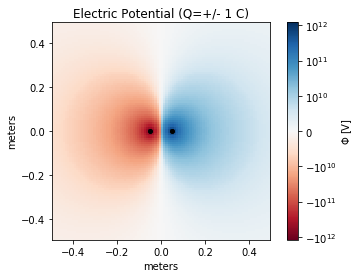

In [47]:
ext = [line.min(),line.max()]*2 
# ext is needed for imshow(). To extend the graph.
# ext = [-.495,.495]*2 == [-.495,.495,-.495,.495]
# This is used to set our boundaries in imshow().

plt.plot(p1[1],p1[0],'ko',markersize=4)
plt.plot(p2[1],p2[0],'ko',markersize=4)
norm = colors.SymLogNorm(linthresh=5e9)
plt.imshow(V,extent=ext,cmap='RdBu',norm=norm)
ticks=[-1e12,-1e11,-1e10,0,1e10,1e11,1e12]
plt.xlabel('meters')
plt.ylabel('meters')
plt.title('Electric Potential (Q=+/- 1 C)')
plt.colorbar(label='$\Phi$ [V]',ticks=ticks)
plt.show()

The electric field is related to the potential by **E** = -**∇**V. Thus for a plane, Ex = -(ΔV) / Δx & Ey = -(ΔV) / Δy.

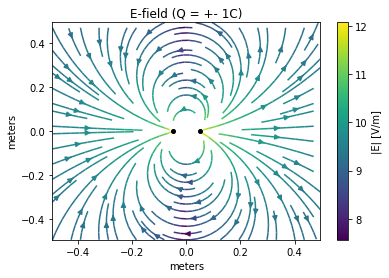

In [27]:
# The electric field.
a = 0.01
Emax = 5e10

# Used for storage.
Ex = np.empty((100,100))
Ey = np.empty((100,100))

# Plotting the most outside perimeter,
Ex[:,0] = -(V[:,1] - V[:,0]) / a # Top Row
Ex[:,-1] = -(V[:,-1] - V[:,-2]) / a # Bottom Row
 
Ey[0,:] = -(V[1,:] - V[0,:]) / a # Leftmost column
Ey[-1,:] = -(V[-1,:] - V[-2,:]) / a # Rightmost column

# Plotting the interior,
for i in range(100):
    for j in range(100):
        if j != 0 and j != 99:
            Ex[i,j] = -1*(V[i,j+1] - V[i,j-1]) / (2*a)
        if i != 0 and i != 99:
            Ey[i,j] = -1*(V[i+1,j] - V[i-1,j]) / (2*a)
            
        # Magnitude    
        E = np.sqrt(Ex[i,j]**2 + Ey[i,j]**2)    
        
        # Adjust the max value so we get reasonable arrow lengths.
        ratio = E/Emax
        if ratio > 1:
            Ex[i,j] /= ratio
            Ey[i,j] /= ratio

            
plt.plot(p1[1],p1[0],'ko',markersize=4) 
plt.plot(p2[1],p2[0],'ko',markersize=4)
plt.streamplot(line,line,Ex,Ey,color=np.log10(np.abs(V)))
plt.xlabel('meters')
plt.ylabel('meters')
plt.title('E-field (Q = +- 1C)')
plt.colorbar(label='|E| [V/m]')
plt.show()

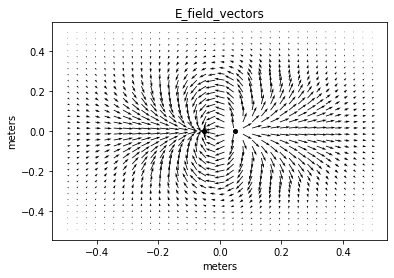

In [28]:
# Plotting with quiver
plt.plot(p1[1],p1[0],'ko',markersize=4) 
plt.plot(p2[1],p2[0],'ko',markersize=4)
# (plotting every 3rd element for clarity)
plt.quiver(line[::3],line[::3],Ex[::3,::3],Ey[::3,::3])
plt.xlabel('meters')
plt.ylabel('meters')
plt.title('E_field_vectors')
plt.show()

/home/b00g13m4n/Coding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


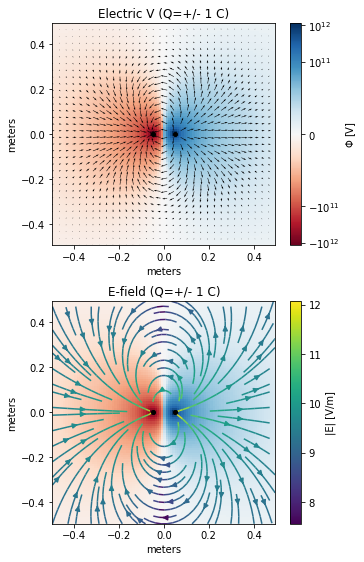

In [46]:
# we can also plot everything together in one figure if we want, 
# by combining the V and E-field plots and using the 
# subplot routine to see both the vector field and the stream lines:

fig=plt.figure(figsize=(6,8))

ax0=fig.add_subplot(2,1,1)
ax0.plot(p1[1],p1[0],'ko',markersize=4)
ax0.plot(p2[1],p2[0],'ko',markersize=4)
norm = colors.SymLogNorm(linthresh=5e9)   
vp=ax0.imshow(V,extent=ext,cmap='RdBu',norm=norm)
ax0.quiver(line[::3],line[::3],Ex[::3,::3],Ey[::3,::3])
plt.xlabel('meters')
plt.ylabel('meters')
plt.title('Electric V (Q=+/- 1 C)')
plt.colorbar(vp,label='$\Phi$ [V]',ax=ax0,ticks=[-1e12,-1e11,0,1e11,1e12])

# Now let's combine the V plot with the E-field streamplot
ax1=fig.add_subplot(2,1,2)
ax1.plot(p1[1],p1[0],'ko',markersize=4)
ax1.plot(p2[1],p2[0],'ko',markersize=4)
norm = colors.SymLogNorm(linthresh=5e9)
ax1.imshow(V,extent=ext,cmap='RdBu',norm=norm)
ep=ax1.streamplot(line,line,Ex,Ey,color=np.log10(np.abs(V)))
plt.title('E-field (Q=+/- 1 C)')
plt.xlabel('meters')
plt.ylabel('meters')
plt.colorbar(ep.lines,label='|E| [V/m]',ax=ax1)

fig.subplots_adjust(bottom=0.08,top=0.95,left=0.2,right=0.9,hspace=0.25)
fig.show()

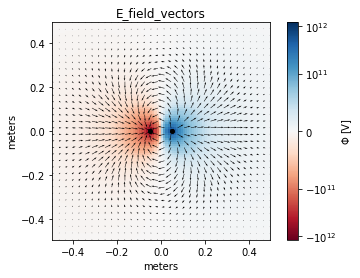

In [50]:
# Without subplots.
plt.plot(p1[1],p1[0],'ko',markersize=4) 
plt.plot(p2[1],p2[0],'ko',markersize=4)
# (plotting every 3rd element for clarity)
vp=plt.imshow(V,extent=ext,cmap='RdBu',norm=norm)
plt.quiver(line[::3],line[::3],Ex[::3,::3],Ey[::3,::3])
plt.xlabel('meters')
plt.ylabel('meters')
plt.title('E_field_vectors')
plt.colorbar(vp,label='$\Phi$ [V]',ticks=[-1e12,-1e11,0,1e11,1e12])
plt.show()

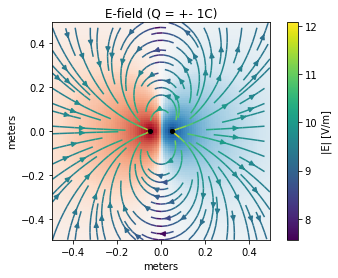

In [42]:
# Without subplots.
plt.plot(p1[1],p1[0],'ko',markersize=4) 
plt.plot(p2[1],p2[0],'ko',markersize=4)
plt.imshow(V,extent=ext,cmap='RdBu',norm=norm)
plt.streamplot(line,line,Ex,Ey,color=np.log10(np.abs(V)))
plt.xlabel('meters')
plt.ylabel('meters')
plt.title('E-field (Q = +- 1C)')
plt.colorbar(label='|E| [V/m]')
plt.show()